##### Sampling from Discrete Distributions

In [4]:
import numpy as np
import matplotlib.pyplot as plt

**1. Choose a value for the probability parameter p in the geometric distribution and simulate 10,000 outcomes. You can experiment with a small, moderate and large value if you like.**

In [13]:
z = np.random.geometric(p=0.35, size = 10000)

**2. Simulate the 6 point distribution**

| $X$  |  1 | 2  | 3  | 4  |5   | 6  |
|---|---|---|---|---|---|---|
| $p_i$  | 7/48  | 5/48  | 1/8  | 1/16  | 1/4  | 5/16  |

**a) Using the crude/direct method**

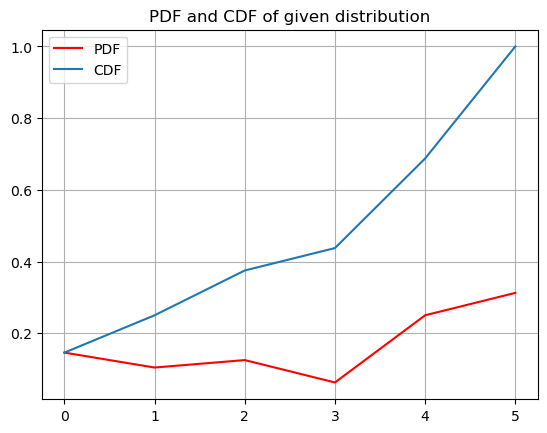

Intervals: [(0, 0.14583333333333334), (0.14583333333333334, 0.25), (0.25, 0.375), (0.375, 0.4375), (0.4375, 0.6875), (0.6875, 1.0)]


In [25]:
u = np.random.uniform(1, 10, 10000)

pdf = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
cdf = np.cumsum(pdf)

plt.plot([i for i in range(len(pdf))], pdf, color="red", label="PDF")
plt.plot([i for i in range(len(cdf))], cdf, label="CDF")
plt.title("PDF and CDF of given distribution")
plt.grid()
plt.legend()
plt.show()

intervals = [(0, cdf[0])]+[(cdf[i-1], cdf[i]) for i in range(1, len(cdf))]
print(f"Intervals: {intervals}")

r = np.rand

Randomly generating 1000 values, mapping into discrete distribution and comparing with original

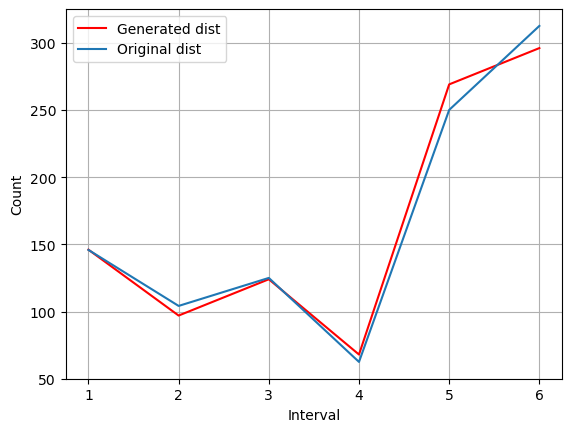

In [35]:
U = np.random.rand(1000)



def insert_into_categories(values, intervals=intervals):
    new_dist = {i: 0 for i in range(1, len(intervals)+1)}
    for value in values:
        for i, interval in enumerate(intervals): # Linear search
            if interval[0] < value and value <= interval[1]:
                new_dist[i+1] += 1
    return new_dist

rg_discrete_dist = insert_into_categories(U)

plt.plot(rg_discrete_dist.keys(), rg_discrete_dist.values(), label="Generated dist", color="r")
plt.plot([i for i in range(1, len(intervals)+1)], [i*1000 for i in pdf], label="Original dist")
plt.legend()
plt.grid()
plt.ylabel("Count")
plt.xlabel("Interval")
plt.show()

**b) Using the rejection method**

In [ ]:


def accept_reject_method(Y, prob_mass_function):
    r = np.rand
    